In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Налаштування стилю графіків
sns.set(style="whitegrid")

# Завантаження даних
# Важливо вказати роздільник ';', оскільки це специфіка даного CSV файлу
df = pd.read_csv('cardio_train.csv', sep=';')

# Перегляд перших рядків та інформації про дані
print("Розмірність датасету:", df.shape)
display(df.head())
print(df.info())

Розмірність датасету: (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


In [7]:
# Перевірка на пропущені значення
print("Пропущені значення:\n", df.isnull().sum())

# Видалення колонки 'id'
if 'id' in df.columns:
    df = df.drop('id', axis=1)

# Розділення на ознаки (X) та цільову змінну (y)
X = df.drop('cardio', axis=1)
y = df['cardio']

# Розділення на тренувальну та тестову вибірки (80% тренування, 20% тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизація даних (Scaling)
# MLP вимагає, щоб дані мали середнє 0 і дисперсію 1 для кращої збіжності
scaler = StandardScaler()

# Навчаємо скейлер на тренувальних даних і трансформуємо обидві вибірки
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Дані успішно підготовлено та масштабовано.")

Пропущені значення:
 id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64
Дані успішно підготовлено та масштабовано.


In [8]:
# Ініціалізація моделі
mlp = MLPClassifier(
    hidden_layer_sizes=(50, 50),  # Архітектура мережі
    activation='relu',            # Функція активації
    solver='adam',                # Оптимізатор
    alpha=0.0001,                 # Регуляризація L2
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=500,                 # Більше ітерацій для збіжності
    random_state=42,
    verbose=True                  # Виводити прогрес навчання
)

# Навчання моделі
print("Починаємо навчання нейромережі...")
mlp.fit(X_train_scaled, y_train)
print("Навчання завершено!")

Починаємо навчання нейромережі...
Iteration 1, loss = 0.62304458
Iteration 2, loss = 0.57948123
Iteration 3, loss = 0.56327025
Iteration 4, loss = 0.55909682
Iteration 5, loss = 0.55662863
Iteration 6, loss = 0.55377303
Iteration 7, loss = 0.55306395
Iteration 8, loss = 0.54955495
Iteration 9, loss = 0.54822275
Iteration 10, loss = 0.54674369
Iteration 11, loss = 0.54554236
Iteration 12, loss = 0.54335567
Iteration 13, loss = 0.54273128
Iteration 14, loss = 0.54160659
Iteration 15, loss = 0.54040914
Iteration 16, loss = 0.54108357
Iteration 17, loss = 0.54049587
Iteration 18, loss = 0.54048534
Iteration 19, loss = 0.53986476
Iteration 20, loss = 0.53912542
Iteration 21, loss = 0.53881121
Iteration 22, loss = 0.53838607
Iteration 23, loss = 0.53888639
Iteration 24, loss = 0.53886456
Iteration 25, loss = 0.53803528
Iteration 26, loss = 0.53794073
Iteration 27, loss = 0.53784709
Iteration 28, loss = 0.53742023
Iteration 29, loss = 0.53764993
Iteration 30, loss = 0.53795800
Iteration 31, l

Точність моделі (Accuracy): 0.7301

Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



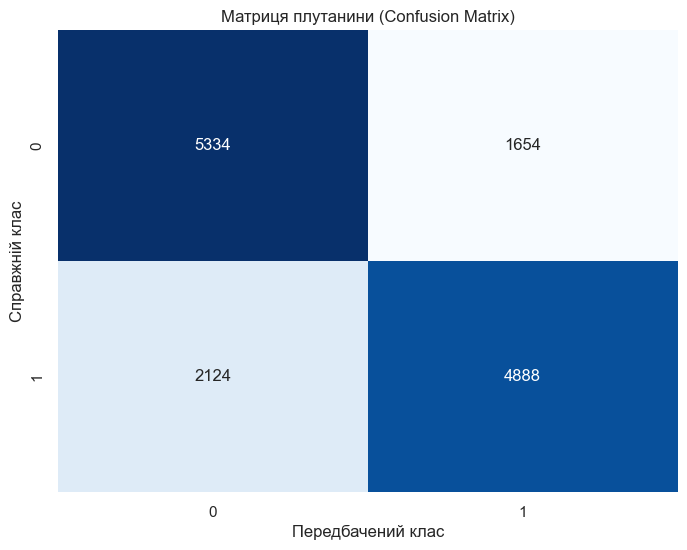

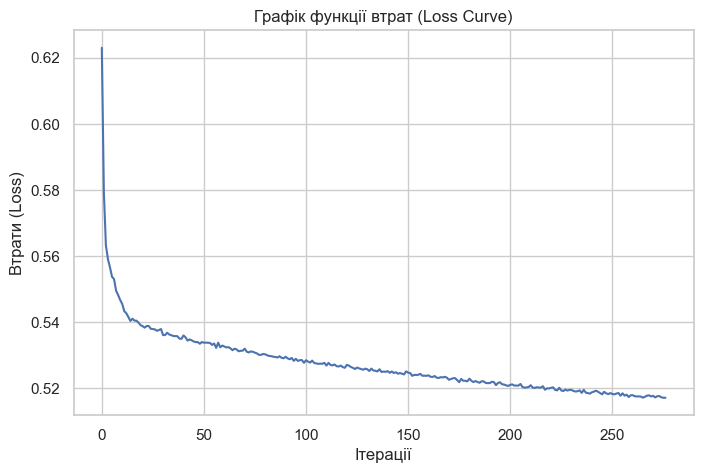

In [9]:
# Прогнозування на тестовій вибірці
y_pred = mlp.predict(X_test_scaled)

# Оцінка точності
accuracy = accuracy_score(y_test, y_pred)
print(f"Точність моделі (Accuracy): {accuracy:.4f}")

# Детальний звіт класифікації
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Візуалізація матриці плутанини
plt.figure(figsize=(8, 6))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Матриця плутанини (Confusion Matrix)')
plt.xlabel('Передбачений клас')
plt.ylabel('Справжній клас')
plt.show()

# Візуалізація кривої втрат (Loss Curve)
plt.figure(figsize=(8, 5))
plt.plot(mlp.loss_curve_)
plt.title('Графік функції втрат (Loss Curve)')
plt.xlabel('Ітерації')
plt.ylabel('Втрати (Loss)')
plt.show()

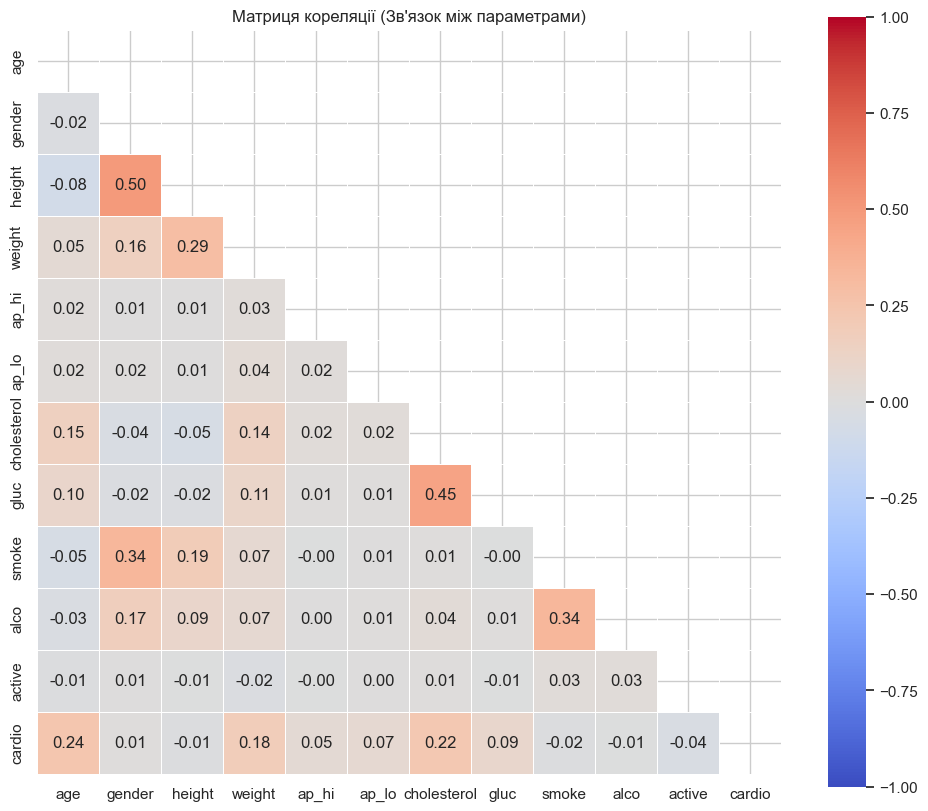

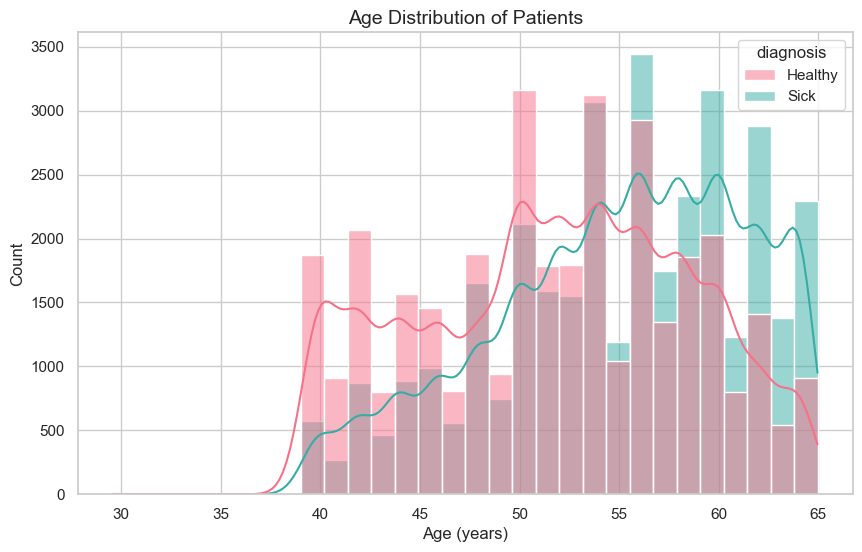

In [11]:
plt.figure(figsize=(12, 10))
# Додаємо параметр numeric_only=True
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool)) # Приховуємо верхній трикутник (він дзеркальний)
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            vmax=1, vmin=-1, center=0, square=True, linewidths=.5)
plt.title('Матриця кореляції (Зв\'язок між параметрами)')
plt.show()

plt.figure(figsize=(10, 6))

df['diagnosis'] = df['cardio'].map({0: 'Healthy', 1: 'Sick'})
df['age_years'] = df['age'] / 365

# Plot
sns.histplot(data=df, x='age_years', hue='diagnosis', kde=True, bins=30, palette="husl")

plt.title('Age Distribution of Patients', fontsize=14)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Count', fontsize=12)

df = df.drop(['diagnosis', 'age_years'], axis=1)

plt.show()